In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('lemonade.csv')

In [3]:
df.columns = [col.lower() for col in df.columns]

In [4]:
def get_lower_and_upper_bounds(x, k = 1.5):
    """Returns lower and upper bounds of series x using IQR range rule with multiplier k"""
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    upper = q3 + k * iqr
    lower = q1 - k * iqr
    
    return lower, upper

In [5]:
df.nunique()

date           365
day              7
temperature    176
rainfall        35
flyers          63
price            1
sales           39
dtype: int64

In [6]:
for col in df[['temperature','rainfall','flyers','sales']]:
    print("Lower outliers for ",col,":")
    if len(df[df[col]<get_lower_and_upper_bounds(df[col])[0]])>0:
        print(df[df[col]<get_lower_and_upper_bounds(df[col])[0]])
    else:
        print("None")
    print("-------")

Lower outliers for  temperature :
         date     day  temperature  rainfall  flyers  price  sales
364  12/31/17  Sunday         15.1       2.5       9    0.5      7
-------
Lower outliers for  rainfall :
None
-------
Lower outliers for  flyers :
         date      day  temperature  rainfall  flyers  price  sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
-------
Lower outliers for  sales :
None
-------


##### Lower outlier for temperature makes sense, 15.1 deg is a reasonable temperature. Would need larger multiple to account for this potentially.
##### Lower outlier for flyers -38 does not make sense and can be dropped

In [7]:
for col in df[['temperature','rainfall','flyers','sales']]:
    print("Upper outliers for ",col,":")
    if len(df[df[col]>get_lower_and_upper_bounds(df[col])[1]])>0:
        print(df[df[col]>get_lower_and_upper_bounds(df[col])[1]])
    else:
        print("None")
    print("-------")

Upper outliers for  temperature :
       date       day  temperature  rainfall  flyers  price  sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
-------
Upper outliers for  rainfall :
         date        day  temperature  rainfall  flyers  price  sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursday         38.2      1.33      16    0.5     14
12    1/13/17     Friday         37.5      1.33      19    0.5     15
15    1/16/17     Monday         30.6      1.67      24    0.5     12
16    1/17/17    Tuesday         32.2      1.43      26    0.5     14
19    1/20/17     Frida

#### Upper outlier for temperature does not make sense - sensor error?
#### Upper outliers for rainfall make sense but based on the large number of them potentially should increase threshold
#### Upper outliers for flyers and sales make sense

### Multiplier of 3

In [8]:
for col in df[['temperature','rainfall','flyers','sales']]:
    print("Lower outliers for ",col,":")
    if len(df[df[col]<get_lower_and_upper_bounds(df[col],3)[0]])>0:
        print(df[df[col]<get_lower_and_upper_bounds(df[col],3)[0]])
    else:
        print("None")
    print("-------")

Lower outliers for  temperature :
None
-------
Lower outliers for  rainfall :
None
-------
Lower outliers for  flyers :
         date      day  temperature  rainfall  flyers  price  sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
-------
Lower outliers for  sales :
None
-------


#### That flyers outlier needs to be removed

In [9]:
for col in df[['temperature','rainfall','flyers','sales']]:
    print("Upper outliers for ",col,":")
    if len(df[df[col]>get_lower_and_upper_bounds(df[col],3)[1]])>0:
        print(df[df[col]>get_lower_and_upper_bounds(df[col],3)[1]])
    else:
        print("None")
    print("-------")

Upper outliers for  temperature :
       date       day  temperature  rainfall  flyers  price  sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
-------
Upper outliers for  rainfall :
         date      day  temperature  rainfall  flyers  price  sales
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
364  12/31/17   Sunday         15.1      2.50       9    0.5      7
-------
Upper outliers for  flyers :
None
-------
Upper outliers for  sales :
       date       day  temperature  rainfall  flyers  price  sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday         93.4      0.51      68    0.5    158
183  7/3/17    Monday         81.5      0.54      68    0.5    235
184  7/4/17   Tuesday         84.2      0.59      49    0.5    534
-------


#### This looks like a better threshold for rainfall. 

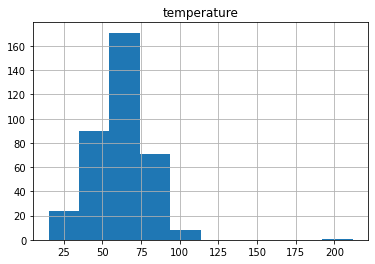

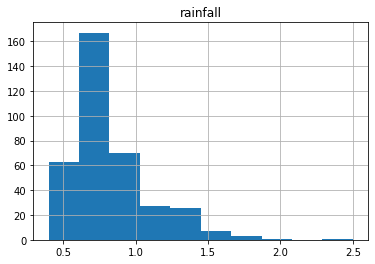

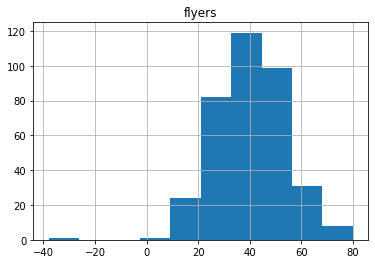

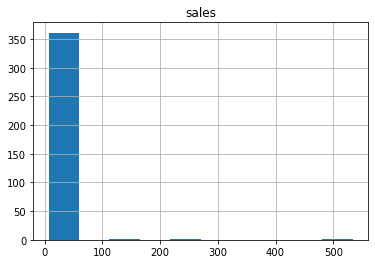

In [10]:
for col in df[['temperature','rainfall','flyers','sales']]:
    df[col].hist()
    plt.title(col)
    plt.show()

Temperature, rainfall, and flyers may be normally distributed. Will see what removing outliers does for all

41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: temperature, dtype: float64


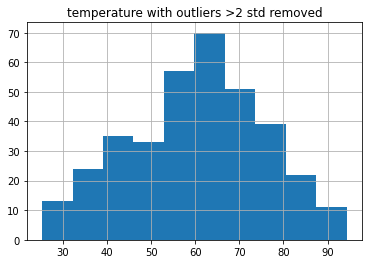

0      2.00
5      1.54
6      1.54
10     1.54
15     1.67
16     1.43
19     1.43
23     1.54
337    1.54
338    1.82
342    1.43
343    1.82
346    1.43
347    1.54
351    1.43
355    1.54
359    1.43
363    1.43
364    2.50
Name: rainfall, dtype: float64


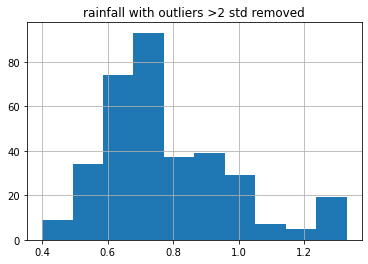

166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
324   -38
338    11
364     9
Name: flyers, dtype: int64


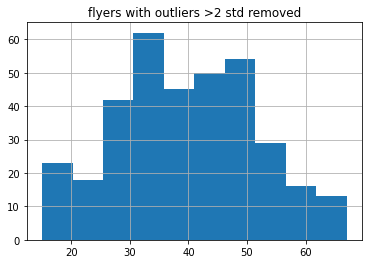

181    143
182    158
183    235
184    534
Name: sales, dtype: int64


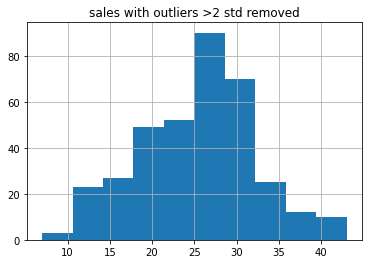

In [11]:
for col in df[['temperature','rainfall','flyers','sales']]:
    x = df[col]
    # Calculate the z-score 
    zscores = pd.Series((x - x.mean()) / x.std())

    # Finds all of the observations two standard deviations or more.
    print(x[zscores.abs() >= 2])
    
    # Plot histogram without the outliers 2 std or more
    df[col][~df[col].isin(x[zscores.abs() >= 2])].hist()
    plt.title(col+" with outliers >2 std removed")
    plt.show()
    

#### Every feature became more normally distributed! Depending on what we are trying to do with the data should decide which outliers to keep or remove. Definitely remove negative flyer and temperature 212 data points as these don't make any sense.

41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: temperature, dtype: float64


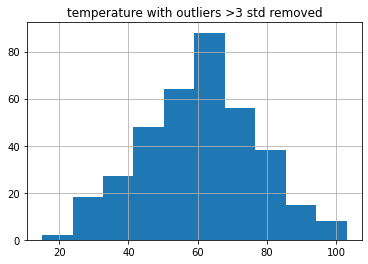

0      2.00
5      1.54
6      1.54
10     1.54
15     1.67
16     1.43
19     1.43
23     1.54
337    1.54
338    1.82
342    1.43
343    1.82
346    1.43
347    1.54
351    1.43
355    1.54
359    1.43
363    1.43
364    2.50
Name: rainfall, dtype: float64


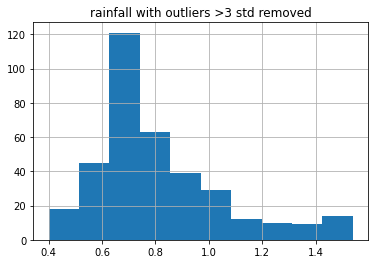

166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
324   -38
338    11
364     9
Name: flyers, dtype: int64


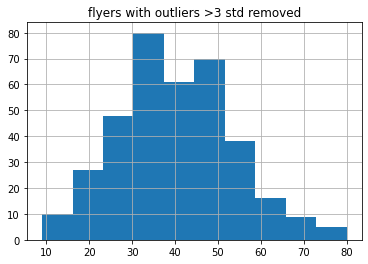

181    143
182    158
183    235
184    534
Name: sales, dtype: int64


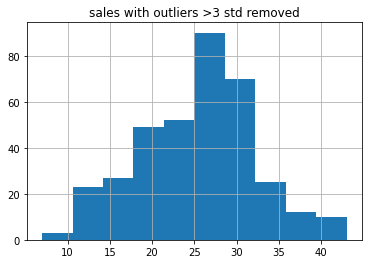

In [12]:
for col in df[['temperature','rainfall','flyers','sales']]:
    x = df[col]
    # Calculate the z-score 
    zscores = pd.Series((x - x.mean()) / x.std())

    # Finds all of the observations two standard deviations or more.
    print(x[zscores.abs() >= 2])
    
    # Plot histogram without the outliers 2 std or more
    df[col][~df[col].isin(x[zscores.abs() >= 3])].hist()
    plt.title(col+" with outliers >3 std removed")
    plt.show()
    

### 3 std is probably good if we want to keep more data points. Really just need to get rid of very high temperature value (212) and negative flyer value (non sensical)